# class_logistic_regression.ipynb

## Data import and test

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

In [10]:
name_data_file="heart_failure_clinical_records_dataset"

data = pd.read_csv(f"../../raw_data/{name_data_file}.csv", na_values=["?"])

# ANN Artificial Neural Network

# CT Classification Tree

# KNN K Nearest Neighbours

In [30]:
# Split the data frame into features and labels
X = data.drop(columns=["DEATH_EVENT"])
y = pd.Categorical(data["DEATH_EVENT"])

assert X.shape == (299, 12), "There should be 299 samples and 12 features in the heart_failure_clinical_records_dataset dataset."
assert y.shape == (299,), "There should be 299 labels in the heart_failure_clinical_records_dataset dataset."

The code below combines Leave-One-Out Cross-Validation (LOOCV) and the K-Nearest Neighbors (KNN) algorithm to determine the optimal value of K. It uses two nested loops: the outer loop performs LOOCV across the entire dataset, meaning that for each iteration, the model is trained on all rows except one and then tested on the excluded row. Within each iteration, the number of neighbors (K) varies from 1 to 40 to identify the K value that yields the highest accuracy.

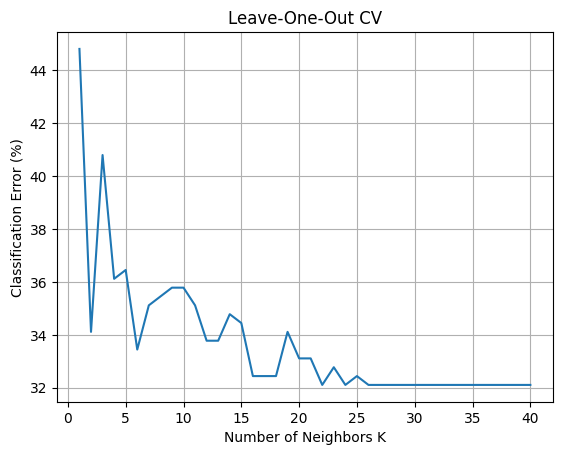

In [31]:
K_neighbours = 40  # Max neighbors
errors = np.zeros((len(X), K_neighbours))

CV_loo = LeaveOneOut()

# Loop through the folds
for fold, (train_index, test_index) in enumerate(CV_loo.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    for k in range(1, K_neighbours + 1):
        # 3.4) For each $k$, define a KNN model with $k$ neighbors, fit it, make predictions.
        # Compute the classification error. 
        # Store the result in errors[fold, k - 1]
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_est = knn.predict(X_test)

        # Classification error for this fold
        errors[fold, k - 1] = np.mean(y_est != y_test)
        

# Plot mean errors for each K
mean_errors = np.mean(errors, axis=0)
f = plt.figure()
plt.title('Leave-One-Out CV')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Classification Error (%)')
plt.plot(range(1, K_neighbours + 1), mean_errors * 100)
plt.grid(True)
plt.show()


In [32]:
# Split data into features and labels
X = data.drop(columns=["DEATH_EVENT"])
y = data["DEATH_EVENT"]

# Split into train and test sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Define number of neighbors
K = 5

# Create and train KNN model
knn = KNeighborsClassifier(n_neighbors=K)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with K={K}: {accuracy:.2%}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")

Accuracy with K=5: 65.00%
Confusion Matrix:
[[35  6]
 [15  4]]


# NB Naive Bayes